# Q-9. 

### Business Understanding:

    In this problem statement we have to build a model that can predict a Windows machine’s probability of getting infected by various families of malware, based on different properties of that machine. The telemetry data containing these properties and the machine infections was generated by combining heartbeat and threat reports collected by Microsoft's endpoint protection solution, Windows Defender.

In [1]:
# Importing libraries

# Default
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Sk-learn libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df_train = pd.read_csv('D:\\FSDS-iNeuron\\3.Resource\Dataset\\Placement_Task\\MicrosoftMalwarePrediction\\train.csv', nrows=1000)
df_train

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,...,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,...,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,...,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,...,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0,0,NaN,53447.0,...,19844.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,00074c9f018c3e3d470115c70249c5da,win8defender,1.1.15100.1,4.18.1807.18075,1.273.920.0,0,7.0,0,NaN,47238.0,...,33133.0,1,NaN,0.0,1,1,0.0,0.0,10.0,0
996,00074d23b53a581a23006c0e0ae0dabc,win8defender,1.1.15200.1,4.18.1807.18075,1.275.497.0,0,7.0,0,NaN,47238.0,...,33115.0,1,NaN,0.0,0,0,0.0,0.0,11.0,0
997,00074e1776d7a11b01583b92ce9a22d1,win8defender,1.1.15200.1,4.18.1807.18075,1.275.568.0,0,7.0,0,NaN,53447.0,...,14746.0,0,NaN,0.0,0,0,0.0,0.0,7.0,1
998,000757f5602ee68e3419d3bfc4be808a,win8defender,1.1.15000.2,4.12.17007.18022,1.271.105.0,0,7.0,0,NaN,53447.0,...,64568.0,0,0.0,0.0,0,1,0.0,0.0,15.0,0


### Let's Understand the data

**Data Set Information:**

Each row in this dataset corresponds to a machine, uniquely identified by a MachineIdentifier. HasDetections is the ground truth and indicates that Malware was detected on the machine. Using the information and labels in train.csv, you must predict the value for HasDetections for each machine in test.csv.

The sampling methodology used to create this dataset was designed to meet certain business constraints, both in regards to user privacy as well as the time period during which the machine was running. Malware detection is inherently a time-series problem, but it is made complicated by the introduction of new machines, machines that come online and offline, machines that receive patches, machines that receive new operating systems, etc. While the dataset provided here has been roughly split by time, the complications and sampling requirements mentioned above may mean you may see imperfect agreement between your cross validation, public, and private scores! Additionally, this dataset is not representative of Microsoft customers’ machines in the wild; it has been sampled to include a much larger proportion of malware machines.

**Attribute Information:**

**Columns**

Unavailable or self-documenting column names are marked with an "NA".

- MachineIdentifier - Individual machine ID
- ProductName - Defender state information e.g. win8defender
- EngineVersion - Defender state information e.g. 1.1.12603.0
- AppVersion - Defender state information e.g. 4.9.10586.0
- AvSigVersion - Defender state information e.g. 1.217.1014.0
- IsBeta - Defender state information e.g. false
- RtpStateBitfield - NA
- IsSxsPassiveMode - NA
- DefaultBrowsersIdentifier - ID for the machine's default browser
- AVProductStatesIdentifier - ID for the specific configuration of a user's antivirus software
- AVProductsInstalled - NA
- AVProductsEnabled - NA
- HasTpm - True if machine has tpm
- CountryIdentifier - ID for the country the machine is located in
- CityIdentifier - ID for the city the machine is located in
- OrganizationIdentifier - ID for the organization the machine belongs in, organization ID is mapped to both specific companies and broad industries
- GeoNameIdentifier - ID for the geographic region a machine is located in
- LocaleEnglishNameIdentifier - English name of Locale ID of the current user
- Platform - Calculates platform name (of OS related properties and processor property)
- Processor - This is the process architecture of the installed operating system
- OsVer - Version of the current operating system
- OsBuild - Build of the current operating system
- OsSuite - Product suite mask for the current operating system.
- OsPlatformSubRelease - Returns the OS Platform sub-release (Windows Vista, Windows 7, Windows 8, TH1, TH2)
- OsBuildLab - Build lab that generated the current OS. Example: 9600.17630.amd64fre.winblue_r7.150109-2022
- SkuEdition - The goal of this feature is to use the Product Type defined in the MSDN to map to a 'SKU-Edition' name that is useful in population reporting. The valid Product Type are defined in %sdxroot%\data\windowseditions.xml. This API has been used since Vista and Server 2008, so there are many Product Types that do not apply to Windows 10. The 'SKU-Edition' is a string value that is in one of three classes of results. The design must hand each class.
- IsProtected - This is a calculated field derived from the Spynet Report's AV Products field. Returns: a. TRUE if there is at least one active and up-to-date antivirus product running on this machine. b. FALSE if there is no active AV product on this machine, or if the AV is active, but is not receiving the latest updates. c. null if there are no Anti Virus Products in the report. Returns: Whether a machine is protected.
- AutoSampleOptIn - This is the SubmitSamplesConsent value passed in from the service, available on CAMP 9+
- PuaMode - Pua Enabled mode from the service
- SMode - This field is set to true when the device is known to be in 'S Mode', as in, Windows 10 S mode, where only Microsoft Store apps can be installed
- IeVerIdentifier - NA
- SmartScreen - This is the SmartScreen enabled string value from registry. This is obtained by checking in order, HKLM\SOFTWARE\Policies\Microsoft\Windows\System\SmartScreenEnabled and HKLM\SOFTWARE\Microsoft\Windows\CurrentVersion\Explorer\SmartScreenEnabled. If the value exists but is blank, the value "ExistsNotSet" is sent in telemetry.
- Firewall - This attribute is true (1) for Windows 8.1 and above if windows firewall is enabled, as reported by the service.
- UacLuaenable - This attribute reports whether or not the "administrator in Admin Approval Mode" user type is disabled or enabled in UAC. The value reported is obtained by reading the regkey HKLM\SOFTWARE\Microsoft\Windows\CurrentVersion\Policies\System\EnableLUA.
- Census_MDC2FormFactor - A grouping based on a combination of Device Census level hardware characteristics. The logic used to define Form Factor is rooted in business and industry standards and aligns with how people think about their device. (Examples: Smartphone, Small Tablet, All in One, Convertible…)
- Census_DeviceFamily - AKA DeviceClass. Indicates the type of device that an edition of the OS is intended for. Example values: Windows.Desktop, Windows.Mobile, and iOS.Phone
- Census_OEMNameIdentifier - NA
- Census_OEMModelIdentifier - NA
- Census_ProcessorCoreCount - Number of logical cores in the processor
- Census_ProcessorManufacturerIdentifier - NA
- Census_ProcessorModelIdentifier - NA
- Census_ProcessorClass - A classification of processors into high/medium/low. Initially used for Pricing Level SKU. No longer maintained and updated
- Census_PrimaryDiskTotalCapacity - Amount of disk space on primary disk of the machine in MB
- Census_PrimaryDiskTypeName - Friendly name of Primary Disk Type - HDD or SSD
- Census_SystemVolumeTotalCapacity - The size of the partition that the System volume is installed on in MB
- Census_HasOpticalDiskDrive - True indicates that the machine has an optical disk drive (CD/DVD)
- Census_TotalPhysicalRAM - Retrieves the physical RAM in MB
- Census_ChassisTypeName - Retrieves a numeric representation of what type of chassis the machine has. A value of 0 means xx
- Census_InternalPrimaryDiagonalDisplaySizeInInches - Retrieves the physical diagonal length in inches of the primary display
- Census_InternalPrimaryDisplayResolutionHorizontal - Retrieves the number of pixels in the horizontal direction of the internal display.
- Census_InternalPrimaryDisplayResolutionVertical - Retrieves the number of pixels in the vertical direction of the internal display
- Census_PowerPlatformRoleName - Indicates the OEM preferred power management profile. This value helps identify the basic form factor of the device
- Census_InternalBatteryType - NA
- Census_InternalBatteryNumberOfCharges - NA
- Census_OSVersion - Numeric OS version Example - 10.0.10130.0
- Census_OSArchitecture - Architecture on which the OS is based. Derived from OSVersionFull. Example - amd64
- Census_OSBranch - Branch of the OS extracted from the OsVersionFull. Example - OsBranch = fbl_partner_eeap where OsVersion = 6.4.9813.0.amd64fre.fbl_partner_eeap.140810-0005
- Census_OSBuildNumber - OS Build number extracted from the OsVersionFull. Example - OsBuildNumber = 10512 or 10240
- Census_OSBuildRevision - OS Build revision extracted from the OsVersionFull. Example - OsBuildRevision = 1000 or 16458
- Census_OSEdition - Edition of the current OS. Sourced from HKLM\Software\Microsoft\Windows NT\CurrentVersion@EditionID in registry. Example: Enterprise
- Census_OSSkuName - OS edition friendly name (currently Windows only)
- Census_OSInstallTypeName - Friendly description of what install was used on the machine i.e. clean
- Census_OSInstallLanguageIdentifier - NA
- Census_OSUILocaleIdentifier - NA
- Census_OSWUAutoUpdateOptionsName - Friendly name of the WindowsUpdate auto-update settings on the machine.
- Census_IsPortableOperatingSystem - Indicates whether OS is booted up and running via Windows-To-Go on a USB stick.
- Census_GenuineStateName - Friendly name of OSGenuineStateID. 0 = Genuine
- Census_ActivationChannel - Retail license key or Volume license key for a machine.
- Census_IsFlightingInternal - NA
- Census_IsFlightsDisabled - Indicates if the machine is participating in flighting.
- Census_FlightRing - The ring that the device user would like to receive flights for. This might be different from the ring of the OS which is currently installed if the user changes the ring after getting a flight from a different ring.
- Census_ThresholdOptIn - NA
- Census_FirmwareManufacturerIdentifier - NA
- Census_FirmwareVersionIdentifier - NA
- Census_IsSecureBootEnabled - Indicates if Secure Boot mode is enabled.
- Census_IsWIMBootEnabled - NA
- Census_IsVirtualDevice - Identifies a Virtual Machine (machine learning model)
- Census_IsTouchEnabled - Is this a touch device ?
- Census_IsPenCapable - Is the device capable of pen input ?
- Census_IsAlwaysOnAlwaysConnectedCapable - Retreives information about whether the battery enables the device to be AlwaysOnAlwaysConnected .
- Wdft_IsGamer - Indicates whether the device is a gamer device or not based on its hardware combination.
- Wdft_RegionIdentifier - NA

## Basic analysis and data preprocessing

In [3]:
# Top 5 records

df_train.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,...,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,...,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,...,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,...,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0,0,NaN,53447.0,...,19844.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1


In [4]:
# Shape of the data

df_train.shape

(1000, 83)

In [5]:
# Column names

df_train.columns

Index(['MachineIdentifier', 'ProductName', 'EngineVersion', 'AppVersion',
       'AvSigVersion', 'IsBeta', 'RtpStateBitfield', 'IsSxsPassiveMode',
       'DefaultBrowsersIdentifier', 'AVProductStatesIdentifier',
       'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm',
       'CountryIdentifier', 'CityIdentifier', 'OrganizationIdentifier',
       'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'Platform',
       'Processor', 'OsVer', 'OsBuild', 'OsSuite', 'OsPlatformSubRelease',
       'OsBuildLab', 'SkuEdition', 'IsProtected', 'AutoSampleOptIn', 'PuaMode',
       'SMode', 'IeVerIdentifier', 'SmartScreen', 'Firewall', 'UacLuaenable',
       'Census_MDC2FormFactor', 'Census_DeviceFamily',
       'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier',
       'Census_ProcessorCoreCount', 'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_ProcessorClass',
       'Census_PrimaryDiskTotalCapacity', 'Census_PrimaryDiskTypeName',
       'Census_

In [6]:
# Data types of the dataset

df_train.dtypes

MachineIdentifier                           object
ProductName                                 object
EngineVersion                               object
AppVersion                                  object
AvSigVersion                                object
                                            ...   
Census_IsPenCapable                          int64
Census_IsAlwaysOnAlwaysConnectedCapable    float64
Wdft_IsGamer                               float64
Wdft_RegionIdentifier                      float64
HasDetections                                int64
Length: 83, dtype: object

In [7]:
# Basic information on dataset

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 83 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   MachineIdentifier                                  1000 non-null   object 
 1   ProductName                                        1000 non-null   object 
 2   EngineVersion                                      1000 non-null   object 
 3   AppVersion                                         1000 non-null   object 
 4   AvSigVersion                                       1000 non-null   object 
 5   IsBeta                                             1000 non-null   int64  
 6   RtpStateBitfield                                   998 non-null    float64
 7   IsSxsPassiveMode                                   1000 non-null   int64  
 8   DefaultBrowsersIdentifier                          54 non-null     float64
 9   AVProduct

In [8]:
# Object type columns

object_cols = [col for col in df_train.columns if df_train[col].dtype == "object"]

print('Categorical columns that will be ordinal encoded:', object_cols)

Categorical columns that will be ordinal encoded: ['MachineIdentifier', 'ProductName', 'EngineVersion', 'AppVersion', 'AvSigVersion', 'Platform', 'Processor', 'OsVer', 'OsPlatformSubRelease', 'OsBuildLab', 'SkuEdition', 'PuaMode', 'SmartScreen', 'Census_MDC2FormFactor', 'Census_DeviceFamily', 'Census_ProcessorClass', 'Census_PrimaryDiskTypeName', 'Census_ChassisTypeName', 'Census_PowerPlatformRoleName', 'Census_InternalBatteryType', 'Census_OSVersion', 'Census_OSArchitecture', 'Census_OSBranch', 'Census_OSEdition', 'Census_OSSkuName', 'Census_OSInstallTypeName', 'Census_OSWUAutoUpdateOptionsName', 'Census_GenuineStateName', 'Census_ActivationChannel', 'Census_FlightRing']


In [9]:
# For numerical features

numerical_features = [feature for feature in df_train.columns if df_train[feature].dtype != 'object']
print(numerical_features)

['IsBeta', 'RtpStateBitfield', 'IsSxsPassiveMode', 'DefaultBrowsersIdentifier', 'AVProductStatesIdentifier', 'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm', 'CountryIdentifier', 'CityIdentifier', 'OrganizationIdentifier', 'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'OsBuild', 'OsSuite', 'IsProtected', 'AutoSampleOptIn', 'SMode', 'IeVerIdentifier', 'Firewall', 'UacLuaenable', 'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier', 'Census_ProcessorCoreCount', 'Census_ProcessorManufacturerIdentifier', 'Census_ProcessorModelIdentifier', 'Census_PrimaryDiskTotalCapacity', 'Census_SystemVolumeTotalCapacity', 'Census_HasOpticalDiskDrive', 'Census_TotalPhysicalRAM', 'Census_InternalPrimaryDiagonalDisplaySizeInInches', 'Census_InternalPrimaryDisplayResolutionHorizontal', 'Census_InternalPrimaryDisplayResolutionVertical', 'Census_InternalBatteryNumberOfCharges', 'Census_OSBuildNumber', 'Census_OSBuildRevision', 'Census_OSInstallLanguageIdentifier', 'Census_OSUILocaleIdentifier', 

In [10]:
# Checking nul values

df_train.isna().sum()

MachineIdentifier                           0
ProductName                                 0
EngineVersion                               0
AppVersion                                  0
AvSigVersion                                0
                                           ..
Census_IsPenCapable                         0
Census_IsAlwaysOnAlwaysConnectedCapable     8
Wdft_IsGamer                               31
Wdft_RegionIdentifier                      31
HasDetections                               0
Length: 83, dtype: int64

In [11]:
df_train.isna().sum().sum()

6741

**Observation:**
- Missing value count is more in some column.

In [12]:
df_train.duplicated().sum()

0

**Observation:**
- There is no duplicate value present in the dataset.

In [13]:
df_train.columns

Index(['MachineIdentifier', 'ProductName', 'EngineVersion', 'AppVersion',
       'AvSigVersion', 'IsBeta', 'RtpStateBitfield', 'IsSxsPassiveMode',
       'DefaultBrowsersIdentifier', 'AVProductStatesIdentifier',
       'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm',
       'CountryIdentifier', 'CityIdentifier', 'OrganizationIdentifier',
       'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'Platform',
       'Processor', 'OsVer', 'OsBuild', 'OsSuite', 'OsPlatformSubRelease',
       'OsBuildLab', 'SkuEdition', 'IsProtected', 'AutoSampleOptIn', 'PuaMode',
       'SMode', 'IeVerIdentifier', 'SmartScreen', 'Firewall', 'UacLuaenable',
       'Census_MDC2FormFactor', 'Census_DeviceFamily',
       'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier',
       'Census_ProcessorCoreCount', 'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_ProcessorClass',
       'Census_PrimaryDiskTotalCapacity', 'Census_PrimaryDiskTypeName',
       'Census_

# EDA

**MachineIdentifier**

In [14]:
df_train['MachineIdentifier'].nunique()

1000

**Observation:**
- There is no repeated identifier

**ProductName**

Text(0.5, 1.0, 'Feature name : ProductName')

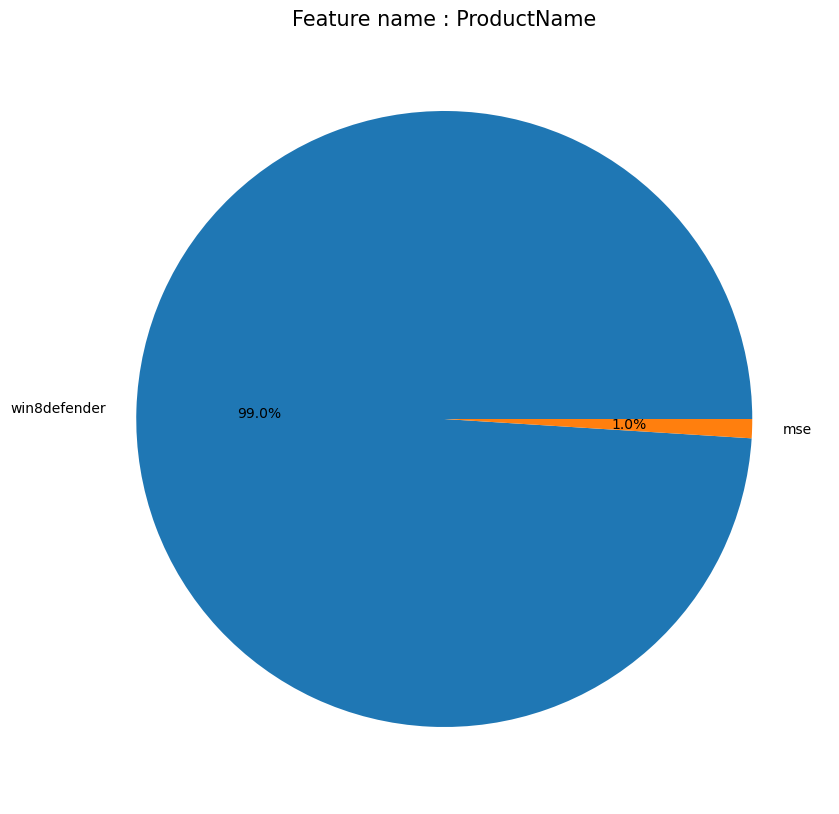

In [15]:
plt.figure(figsize=(20,10))
df_train.value_counts('ProductName').plot(kind="pie",autopct = '%1.1f%%')
plt.title ("Feature name : ProductName", fontsize = 15)

**Observation:**
- 99% of the machines are win8defender

**EngineVersion**

In [16]:
df_train['EngineVersion'].value_counts()

1.1.15100.1    434
1.1.15200.1    414
1.1.15000.2     30
1.1.14800.3     21
1.1.14600.4     19
1.1.15300.6     16
1.1.14901.4     13
1.1.14104.0      9
1.1.13504.0      6
1.1.15300.5      6
1.1.13303.0      6
1.1.14405.2      5
1.1.14202.0      3
1.1.14306.0      3
1.1.14700.5      3
1.1.13407.0      2
1.1.14500.5      2
1.1.15000.1      1
1.1.14700.3      1
1.1.13701.0      1
1.1.13000.0      1
1.1.13804.0      1
1.1.14003.0      1
1.1.13601.0      1
1.1.13903.0      1
Name: EngineVersion, dtype: int64

**Observation:**
- Machine with 1.1.15100.1 version are most

**AppVersion**

In [17]:
df_train['AppVersion'].value_counts()

4.18.1807.18075     568
4.18.1806.18062     103
4.12.16299.15        42
4.10.209.0           31
4.13.17134.1         30
4.16.17656.18052     28
4.8.10240.17443      27
4.9.10586.1106       24
4.13.17134.228       21
4.14.17639.18041     20
4.9.10586.0          15
4.11.15063.0         13
4.12.17007.18022      9
4.8.10240.16384       8
4.14.17613.18039      7
4.10.14393.0          7
4.11.15063.1155       6
4.10.14393.1794       6
4.12.17007.18011      6
4.11.15063.447        5
4.9.10586.494         3
4.13.17134.191        3
4.10.14393.1198       3
4.18.1809.2           2
4.8.207.0             2
4.8.10240.17946       2
4.9.218.0             2
4.9.10586.589         1
4.10.14393.1593       1
4.8.10240.17914       1
4.8.10240.17354       1
4.10.14393.1066       1
4.8.10240.17113       1
4.9.10586.873         1
Name: AppVersion, dtype: int64

**HasDetections**

In [18]:
df_train['HasDetections'].value_counts()

1    512
0    488
Name: HasDetections, dtype: int64

Text(0.5, 1.0, 'Feature name : HasDetections')

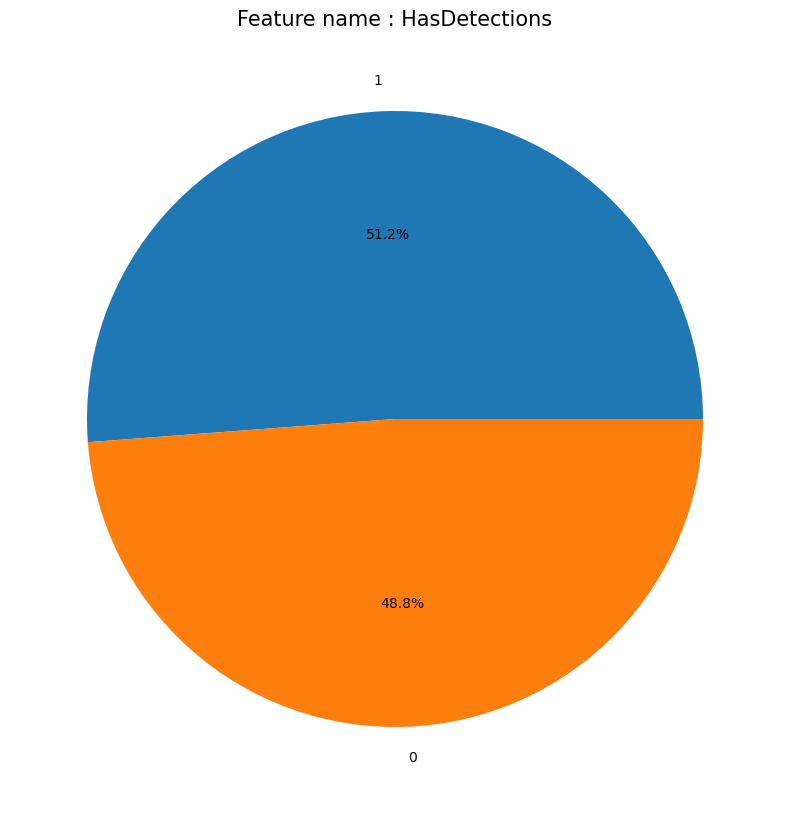

In [19]:
plt.figure(figsize=(20,10))
df_train.value_counts('HasDetections').plot(kind="pie",autopct = '%1.1f%%')
plt.title ("Feature name : HasDetections", fontsize = 15)

**Observation:**
- Output column is balanced

### Feature Encoding

In [20]:
df_train[object_cols]

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,Platform,Processor,OsVer,OsPlatformSubRelease,OsBuildLab,...,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSWUAutoUpdateOptionsName,Census_GenuineStateName,Census_ActivationChannel,Census_FlightRing
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,...,10.0.17134.165,amd64,rs4_release,Professional,PROFESSIONAL,UUPUpgrade,UNKNOWN,IS_GENUINE,Retail,Retail
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,...,10.0.17134.1,amd64,rs4_release,Professional,PROFESSIONAL,IBSClean,UNKNOWN,OFFLINE,Retail,NOT_SET
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,...,10.0.17134.165,amd64,rs4_release,Core,CORE,UUPUpgrade,FullAuto,IS_GENUINE,OEM:NONSLP,Retail
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,...,10.0.17134.228,amd64,rs4_release,Professional,PROFESSIONAL,UUPUpgrade,FullAuto,IS_GENUINE,OEM:NONSLP,Retail
4,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,...,10.0.17134.191,amd64,rs4_release,Core,CORE,Update,FullAuto,IS_GENUINE,Retail,Retail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,00074c9f018c3e3d470115c70249c5da,win8defender,1.1.15100.1,4.18.1807.18075,1.273.920.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,...,10.0.17134.81,amd64,rs4_release,Core,CORE,UUPUpgrade,Notify,IS_GENUINE,OEM:DM,Unknown
996,00074d23b53a581a23006c0e0ae0dabc,win8defender,1.1.15200.1,4.18.1807.18075,1.275.497.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,...,10.0.17134.112,amd64,rs4_release,Core,CORE,UUPUpgrade,Notify,IS_GENUINE,OEM:DM,Retail
997,00074e1776d7a11b01583b92ce9a22d1,win8defender,1.1.15200.1,4.18.1807.18075,1.275.568.0,windows10,x64,10.0.0.0,rs3,16299.15.amd64fre.rs3_release.170928-1534,...,10.0.16299.371,amd64,rs3_release,Professional,PROFESSIONAL,UUPUpgrade,UNKNOWN,IS_GENUINE,Retail,Retail
998,000757f5602ee68e3419d3bfc4be808a,win8defender,1.1.15000.2,4.12.17007.18022,1.271.105.0,windows10,x64,10.0.0.0,rs3,16299.15.amd64fre.rs3_release.170928-1534,...,10.0.16299.309,amd64,rs3_release,Core,CORE,Upgrade,FullAuto,IS_GENUINE,Retail,Retail


In [21]:
import category_encoders as ce

encoder=ce.OneHotEncoder(cols=object_cols, handle_unknown='return_nan', return_df=True,use_cat_names=True)

In [22]:
df_train = encoder.fit_transform(df_train)

### Handling null values

In [23]:
# Creating a dictonary to get store the column names as key and percentage of null values as values

nan_count = {value:list(df_train.isnull().sum()*100/df_train.shape[0])[index] for index,value in enumerate(df_train.columns)}

In [24]:
# Sorting the dictonary in descending order based on percentage of missing values

nan_count = {k:v for k,v in sorted(nan_count.items(), key=lambda item:item[1], reverse=True)}
nan_count

{'DefaultBrowsersIdentifier': 94.6,
 'Census_IsFlightingInternal': 81.3,
 'Census_ThresholdOptIn': 61.4,
 'Census_IsWIMBootEnabled': 61.3,
 'OrganizationIdentifier': 31.7,
 'SMode': 5.5,
 'CityIdentifier': 4.5,
 'Census_InternalBatteryNumberOfCharges': 3.6,
 'Wdft_IsGamer': 3.1,
 'Wdft_RegionIdentifier': 3.1,
 'Census_FirmwareManufacturerIdentifier': 2.6,
 'Census_FirmwareVersionIdentifier': 2.3,
 'Census_IsFlightsDisabled': 2.2,
 'Census_OEMModelIdentifier': 1.5,
 'Census_OEMNameIdentifier': 1.3,
 'IeVerIdentifier': 1.2,
 'Census_TotalPhysicalRAM': 1.2,
 'Firewall': 0.8,
 'Census_IsAlwaysOnAlwaysConnectedCapable': 0.8,
 'Census_PrimaryDiskTotalCapacity': 0.7,
 'Census_SystemVolumeTotalCapacity': 0.7,
 'Census_OSInstallLanguageIdentifier': 0.7,
 'Census_ProcessorCoreCount': 0.4,
 'Census_ProcessorManufacturerIdentifier': 0.4,
 'Census_ProcessorModelIdentifier': 0.4,
 'AVProductStatesIdentifier': 0.3,
 'AVProductsInstalled': 0.3,
 'AVProductsEnabled': 0.3,
 'IsProtected': 0.3,
 'Census_

### Barplot
To display percentage of missing values

C:\Users\Sai\AppData\Local\Temp\ipykernel_5496\3332505740.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_yticklabels(map('{:.1f}%'.format, plot.yaxis.get_majorticklocs()))


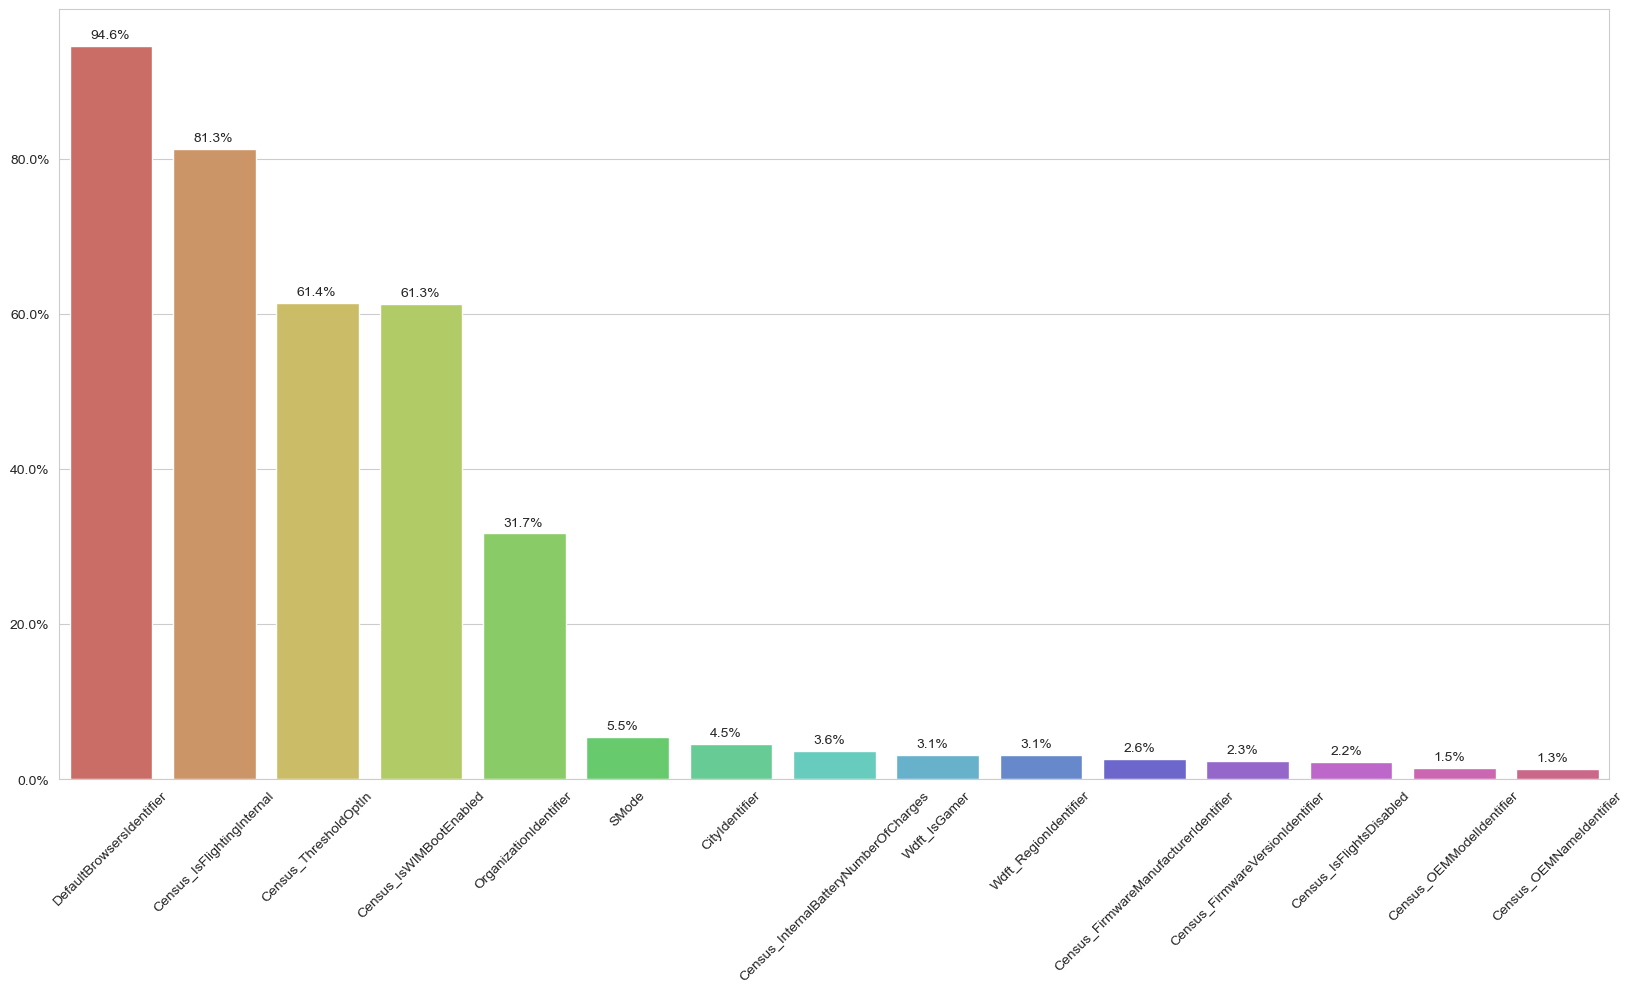

In [25]:
## Plotting graph to display top 15 features with most number of missing values

sns.set_style(style='whitegrid')
plt.figure(figsize=(20,10))

plot = sns.barplot(x=list(nan_count.keys())[:15], y=list(nan_count.values())[:15], palette='hls')

# Add annotation above each bar signiifying their value
for p in plot.patches:
  plot.annotate('{:.1f}%'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+1))

# Make y axis more interpretable
plot.set_yticklabels(map('{:.1f}%'.format, plot.yaxis.get_majorticklocs()))
plt.xticks(rotation=45)
plt.show()

In [26]:
def remove_na(df, nan_feat):
  '''
  This function removes features with more than 70% missing data,
  and removes rows that have NA values from features have less than 5% missing data. 
  '''

  # Removing features having more than 70 null values
  df = df.dropna(axis=1, thresh=700)

  # Removing rows having NA from above created dictionaryof features
  df = df.dropna(subset=nan_feat)

  # Reset index
  df = df.reset_index(drop=True)

  return df

In [27]:
# List of features having less than 5% NA

na_5 = {k for k,v in nan_count.items() if v<5}

In [28]:
na_5

{'ProductName_win8defender',
 'OsBuildLab_14393.1066.amd64fre.rs1_release_sec.170327-1835',
 'AppVersion_4.8.10240.17914',
 'MachineIdentifier_0000741c95673865b8783d888627d77b',
 'MachineIdentifier_00038c06bcce39ca8692fb8acfc3cea7',
 'MachineIdentifier_0005b62e587dbc025a306afc56c78ac6',
 'Platform_windows7',
 'MachineIdentifier_0002c87cb9129bf98de74dfd9abd0c50',
 'MachineIdentifier_00040320ba13e01db5affa08475a2eb9',
 'AppVersion_4.12.17007.18022',
 'AppVersion_4.18.1807.18075',
 'MachineIdentifier_0005215ec08f29e77a48debba1a7b62a',
 'AvSigVersion_1.263.448.0',
 'Census_OSVersion_10.0.15063.850',
 'AvSigVersion_1.275.790.0',
 'Census_OSVersion_10.0.15063.502',
 'MachineIdentifier_0001a4d46556b7c086b100b36830d9c1',
 'MachineIdentifier_0006a55ef1a15cde6cb4d7ddaa9c82b4',
 'MachineIdentifier_0002215c3de7469ccda8c51a6d132562',
 'AvSigVersion_1.275.627.0',
 'AvSigVersion_1.239.1069.0',
 'MachineIdentifier_00037a5ff54ba7297fe33b5fc84828c2',
 'MachineIdentifier_00059ea2ad4dce7c1b0a577dd74f6f93'

In [29]:
df_train.shape

(1000, 1991)

In [30]:
# Dropping null values above 70% threshold

df_null = remove_na(df_train, na_5)

In [31]:
# Getting null count on rest column

df_null.isna().sum().sum()

45

In [32]:
df_null.shape

(833, 1986)

**Observation:**
- 9 columns dropped

In [33]:
# Getting null value count in each column

for column in df_null.columns:
    print(column, ':' ,df_train[column].isna().sum())

MachineIdentifier_0000028988387b115f69f31a3bf04f09 : 0
MachineIdentifier_000007535c3f730efa9ea0b7ef1bd645 : 0
MachineIdentifier_000007905a28d863f6d0d597892cd692 : 0
MachineIdentifier_00000b11598a75ea8ba1beea8459149f : 0
MachineIdentifier_000014a5f00daa18e76b81417eeb99fc : 0
MachineIdentifier_000016191b897145d069102325cab760 : 0
MachineIdentifier_0000161e8abf8d8b89c5ab8787fd712b : 0
MachineIdentifier_000019515bc8f95851aff6de873405e8 : 0
MachineIdentifier_00001a027a0ab970c408182df8484fce : 0
MachineIdentifier_00001a18d69bb60bda9779408dcf02ac : 0
MachineIdentifier_00001b3b3cf8c8c079a272ce51031753 : 0
MachineIdentifier_00001b924fcc6922321cfadbafd8a91a : 0
MachineIdentifier_00001f26e9e5775277d6231fc6ac9e70 : 0
MachineIdentifier_000024872c81cf03fa862aa8f99e0984 : 0
MachineIdentifier_0000258d2b847c7549150cfec6464473 : 0
MachineIdentifier_000027c68b89acb49d4017763b043449 : 0
MachineIdentifier_000028150912f45b1dc667164de489ef : 0
MachineIdentifier_00002a7fd74f9ca4a59a679a7cc80388 : 0
MachineIde

**Observation:**
- We need to handle the remaining null values

### Feature Selection

### Splitting data to X and y 

In [34]:
X = df_null.drop('HasDetections', axis=1)

In [35]:
y = df_null['HasDetections']

### Imputing null values using KNN

Finding the optimal n_neighbour value for KNN imputer

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from statistics import mean

results=[]
# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
strategies = [str(i) for i in [1,3,5,7,9]]
for s in strategies:
    pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', LogisticRegression())])
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=2, n_jobs=-1)
    results.append(scores)
    print('n_neighbors= %s || accuracy (%.4f)' % (s , mean(scores)))

n_neighbors= 1 || accuracy (0.4922)
n_neighbors= 3 || accuracy (0.4922)
n_neighbors= 5 || accuracy (0.4922)
n_neighbors= 7 || accuracy (0.4922)
n_neighbors= 9 || accuracy (0.4922)


**Observation:**
- We can observe the accuracy for all of the above values of n is same Hence choosing n = 1

In [37]:
# define imputer

knn_pipeline = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=3))])

In [38]:
X_knn = knn_pipeline.fit_transform(X)

### Train test split

In [39]:
# Split the data into training and validation sets

X_train, X_val, y_train, y_val = train_test_split(X_knn, y, test_size=0.2, random_state=42)

### Finetuning model

In [46]:
# Defining parameters for tuning

from sklearn.model_selection import GridSearchCV

params = {'penalty':['l1', 'l2', 'elasticnet'],  
          'C':[1.0,5.0,10.0], 
          'max_iter':[50,100,150], 
          'multi_class':['auto', 'ovr', 'multinomial'], 
          'n_jobs':[1,-1],     
}

In [47]:
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=params, n_jobs=-1, verbose=3, cv=3)

In [48]:
# Fitting data

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


C:\Users\Sai\anaconda3\envs\placementTask\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
324 fits failed out of a total of 486.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
162 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Sai\anaconda3\envs\placementTask\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Sai\anaconda3\envs\placementTask\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Sai\anaconda3\envs\placementTask\lib\site-packages\sklearn\linear_mod

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1.0, 5.0, 10.0], 'max_iter': [50, 100, 150],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'n_jobs': [1, -1],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             verbose=3)

In [49]:
# Getting best parameters

grid_search.best_params_

{'C': 1.0, 'max_iter': 50, 'multi_class': 'auto', 'n_jobs': 1, 'penalty': 'l2'}

### Model Training

In [50]:
# Training the model with best parameters

model = LogisticRegression(C = 1.0, max_iter = 50, multi_class = 'auto', n_jobs = 1, penalty = 'l2')
model.fit(X_train, y_train)

LogisticRegression(max_iter=50, n_jobs=1)

In [53]:
y_pred_train = model.predict(X_train)

train_accuracy = accuracy_score(y_train, y_pred_train)

print('Train accuracy: ', train_accuracy)

Train accuracy:  0.509009009009009


# Model evaluation

In [54]:
val_predictions = model.predict(X_val)
accuracy = accuracy_score(y_val, val_predictions)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.5029940119760479
